In [14]:
from keras.models import load_model
model = load_model("modelEYE_1_better.h5")

In [15]:
import cv2
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf

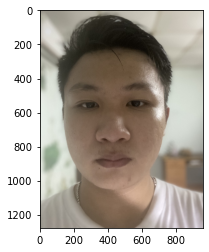

In [16]:
img = cv2.imread('4579b8c58262423c1b73.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

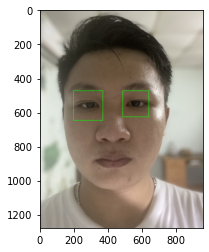

In [17]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for(x, y, w, h) in eyes:
    eye_cascade = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

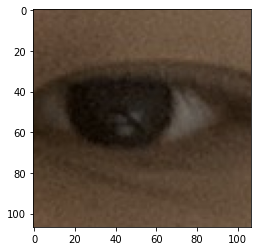

In [18]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

for x,y,w,h in eyes:
    roi_gray  = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale (roi_gray)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for (ex, ey, ew, eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [19]:
eyes_roi.shape

(107, 107, 3)

In [20]:
final_image = cv2.resize(eyes_roi, (224, 224))
final_image = np.expand_dims(final_image, axis =0) ## need fourth dimension
final_image = final_image/255.0
final_image.shape

(1, 224, 224, 3)

In [21]:
predict = model.predict(final_image)
if (predict)>0: print('Open')
else: print('Close')

1/1 [==============================] - 0s 188ms/step
Open


# Using Cv2 detectition Face & Eyes for Running Model on Webcam

In [ ]:
import cv2
import numpy as np

path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(0)
# Check if the webcam is opened correctly
if not cap.isOpened():
  cap = cv2.VideoCapture(0)
if not cap.isOpened():
  raise IOError("Cannot open webcam")
countDis = 0
countClose = 0
while True:
    alarmThreshold_Sleep = 5
    alarmThreshold_Distraction = 20
    ret,frame = cap.read()
    frame = cv2.flip(frame, 1)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)

    if len(faces) == 0:
        status = 'Focus On Your Road'
        countDis +=1
        if countDis >= alarmThreshold_Distraction:
            cv2.putText(frame, "Distraction Detected! Alarm!", 
                        (100, 100), cv2.FONT_HERSHEY_SIMPLEX,
                        1.0,(0, 0, 255),
                        lineType=cv2.LINE_AA)
            cv2.imshow('Distraction', frame)
    else:
        countDis =0
        for(x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

            eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye_tree_eyeglasses.xml')
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            eyes = eye_cascade.detectMultiScale(gray,1.1,4)
            for x,y,w,h in eyes:
                roi_gray = gray[y:y+h, x:x+w]
                roi_color = frame[y:y+h, x:x+w]
                cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 1)
                eyess = eye_cascade.detectMultiScale(roi_gray)
                if len(eyess) == 0:
                    print("eyes are not detected")
                    status = "Closed"
                    countClose +=1
                else:
                    for (ex, ey, ew, eh) in eyess:
                        eyes_roi = roi_color[ey:ey+eh, ex:ex + ew]
                        final_image = cv2.resize(eyes_roi, (224,224))
                        final_image = np.expand_dims (final_image, axis =0) ## need fourth dimension
                        final_image = final_image/255.0
                        Predictions = model.predict(final_image)

                    if (Predictions>0): 
                        status = "Opened"
                        countClose = 0

                if countClose > alarmThreshold_Sleep:
                    cv2.putText(frame, "Sleep detected! Alarm!", (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255),
                    lineType=cv2.LINE_AA)
                    cv2.imshow('Sleep Detection', frame)

    font = cv2.FONT_HERSHEY_SIMPLEX
    # Use putText() method for
    # inserting text on video
    cv2.putText(frame,status,(100, 100),font,3,(0, 255, 0),2,cv2.LINE_AA)
    cv2.imshow('Drowsiness Detection Tutorial', frame)
    if cv2.waitKey(2) & 0xFF== ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

False
False
False
False
eyes are not detected
False
1/1 [==============================] - 0s 43ms/step
False
1/1 [==============================] - 0s 16ms/step
False
1/1 [==============================] - 0s 26ms/step
False
1/1 [==============================] - 0s 37ms/step
False
eyes are not detected
False
1/1 [==============================] - 0s 31ms/step
False
eyes are not detected
False
1/1 [==============================] - 0s 16ms/step
False
eyes are not detected
False
eyes are not detected
False
1/1 [==============================] - 0s 15ms/step
False
1/1 [==============================] - 0s 38ms/step
False
eyes are not detected
1/1 [==============================] - 0s 16ms/step
False
False
1/1 [==============================] - 0s 16ms/step
eyes are not detected
False
1/1 [==============================] - 0s 31ms/step
False
eyes are not detected
1/1 [==============================] - 0s 18ms/step
eyes are not detected
False
eyes are not detected
1/1 [===================